# Quasar distribution in a 1Gpc cube

In this Python notebook you will find

1 . A generated distribution of quasars using a uniform distribution 

    1.1 A grid conformed by positions every 20 kpc in x,y,z     
    1.2 Output of a $\Gamma(x,y,z)$ in the grid with periodic conditions
    
    
2 . Positions of QSOs obtained from LyMAS

    2.1 Output of Gamma(x,y,x)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234) #To get always the same random points


# 1. Positions of QSOs using a Uniform Distribution 
Create a cube 100 Mpc x 100 Mpc x 100 Mpc

In [2]:
Nsize = 10000 #Number of Quasars
size_array = ( Nsize,)
box_size = 1.0 #Represents 1 Gpc

In [3]:
# from 0 to 1 Gpc
cube = np.random.uniform(0.0, box_size, size = size_array) 
cube = np.array(cube,dtype = {'names': ('cx', 'cy', 'cz'),'formats': ('f8', 'f8', 'f8')} )
cube['cy'] = np.random.uniform(0.0, box_size, size=size_array)
cube['cz'] = np.random.uniform(0.0, box_size, size=size_array)

#cube = np.random.uniform(0,1,size=(n_size,))
#cube = np.array(cube, dtype=[('x','f8'),('y','f8'),('z','f8')])
#cube['y'] = np.random.uniform(0,1,size=(n_size,))
#cube['z'] = np.random.uniform(0,1,size=(n_size,))

cube

array([(0.1915194503788923, 0.7166881698628262, 0.5542693865183056),
       (0.6221087710398319, 0.5741470442958853, 0.1809782379192011),
       (0.4377277390071145, 0.6704131494399272, 0.37612515633291255), ...,
       (0.1465507802420497, 0.9848278931708329, 0.12055533702696508),
       (0.7056196693420219, 0.9892668859932857, 0.33285588338642014),
       (0.8408635109018199, 0.8115507743851926, 0.6205747710498253)], 
      dtype=[('cx', '<f8'), ('cy', '<f8'), ('cz', '<f8')])

In [4]:
cube['cx']

array([ 0.19151945,  0.62210877,  0.43772774, ...,  0.14655078,
        0.70561967,  0.84086351])

In [5]:
cube['cy']

array([ 0.71668817,  0.57414704,  0.67041315, ...,  0.98482789,
        0.98926689,  0.81155077])

In [6]:
cube['cz']

array([ 0.55426939,  0.18097824,  0.37612516, ...,  0.12055534,
        0.33285588,  0.62057477])

In [7]:
#To visualize a slice 

slice_cube = (cube['cx']>0.49) * (cube['cx']<0.50)


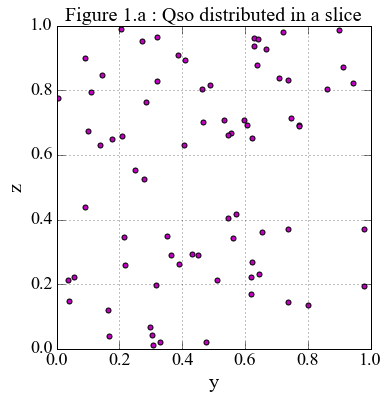

In [8]:
#cube_d = plt.imshow(cube[:,:,51], cmap=plt.cm.BuPu_r, origin = 'lower')
plt.figure(figsize=(5.5,5.5))
plt.plot(cube['cy'][slice_cube], cube['cz'][slice_cube], ls = 'None', ms = 5, marker = 'o', color='m')
plt.xlabel('y')
plt.ylabel('z')
plt.tight_layout()
plt.savefig("quasar_distribution.pdf")
plt.title('Figure 1.a : Qso distributed in a slice')
plt.grid()


In [9]:
cube['cy'][slice_cube]

array([ 0.60545966,  0.62764532,  0.45043843,  0.48775708,  0.30739684,
        0.11057452,  0.86154074,  0.0889897 ,  0.27950303,  0.24930556,
        0.46578514,  0.1451157 ,  0.16646267,  0.73629444,  0.62214775,
        0.36536699,  0.20622164,  0.21441885,  0.38705469,  0.55629829,
        0.09971968,  0.46281788,  0.39038802,  0.31842084,  0.00347538,
        0.91241808,  0.90012234,  0.35270488,  0.73655738,  0.21900505,
        0.7464876 ,  0.29612236,  0.56180083,  0.47441232,  0.27231301,
        0.73725226,  0.32083228,  0.32891444,  0.63719903,  0.62972463,
        0.80223498,  0.64356262,  0.30217267,  0.0547939 ,  0.57211138,
        0.70795379,  0.65381146,  0.03494283,  0.62391986,  0.31734529,
        0.94453343,  0.13955732,  0.5120375 ,  0.77119717,  0.4081154 ,
        0.0907911 ,  0.66662996,  0.77118847,  0.9790497 ,  0.7200116 ,
        0.64127745,  0.2067889 ,  0.03859074,  0.61848958,  0.61993167,
        0.28381727,  0.97826727,  0.54659381,  0.59778221,  0.54

(array([ 1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,
         0.,  1.,  2.,  1.,  1.,  1.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,
         2.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,
         1.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  5.,  2.,
         2.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  1.,  0.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0.00347538,  0.01323112,  0.02298687,  0.03274261,  0.04249835,
         0.0522541 ,  0.06200984,  0.07176558,  0.08152133,  0.09127707,
         0.10103281,  0.11078856,  0.1205443 ,  0.13030004,  0.14005579,
         0.14981153,  0.15956727,  0.16932301,  0.17907876,  0.1888345 ,
         0.19859024,  0.20834599,  0.21810173,  0.22785747,  0.23761322,
         0.24736896,  0.2571247 ,  0.26688045,  0.27663619,  0.286391

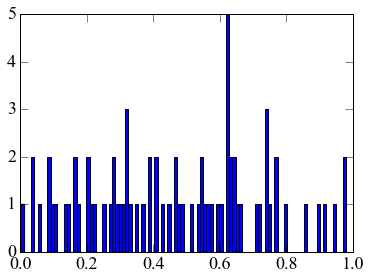

In [10]:
#Just a histogram of the number of y points in a slice 
plt.hist(cube['cy'][slice_cube],bins=100)

## 1.1 Grid to calculate the distance every 20 kpc

In [11]:
#Grid
xx = np.arange(0.20,1.00,0.20)
yy = np.arange(0.20,1.00,0.20)
zz = np.arange(0.20,1.00,0.20)
print('Size of measuring grid:',xx.size*yy.size*zz.size)

Size of measuring grid: 64


## 1.2 Calculating the photoionisation rate : $\Gamma$(x,y,z)

In [12]:
#Some constant values
Lum = 1.0   #Test value
lamb0 = 10 # Test value
coeff = Lum/(4*np.pi)
#These constant values go in the formula below
#Gamma_p1 = np.sum(coeff* np.exp(-dist/lamb0)/(dist*dist) )
#Gamma_p1

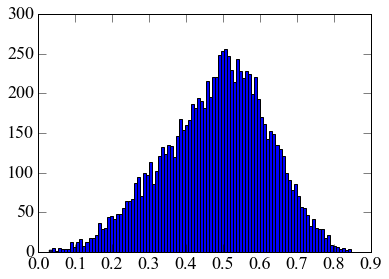

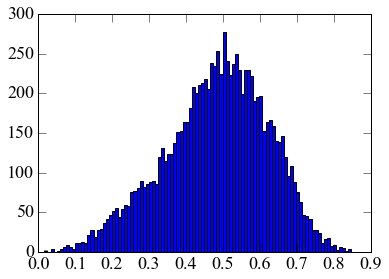

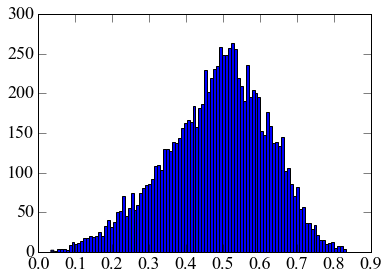

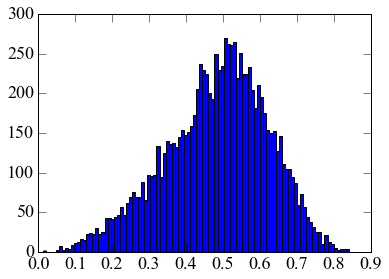

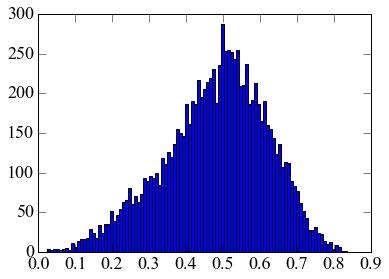

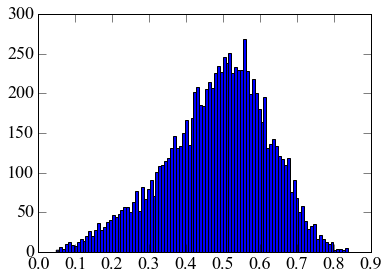

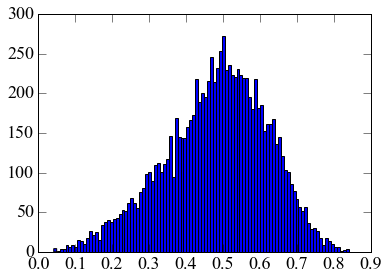

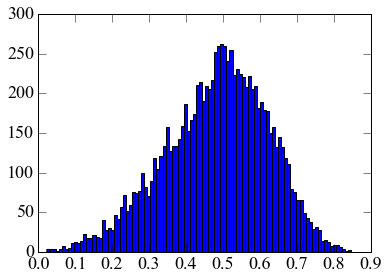

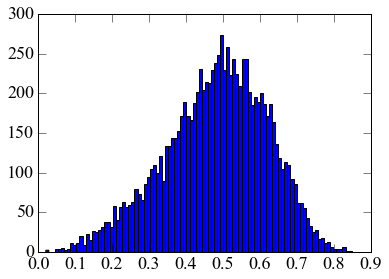

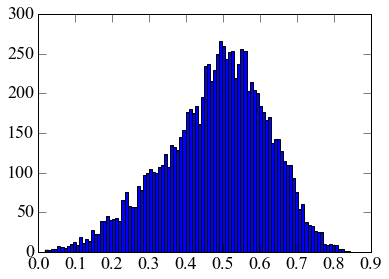

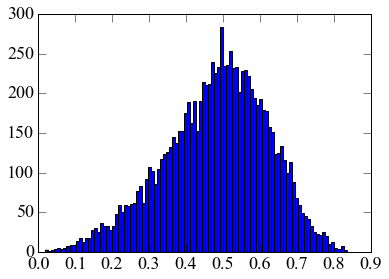

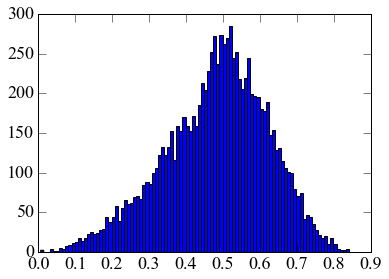

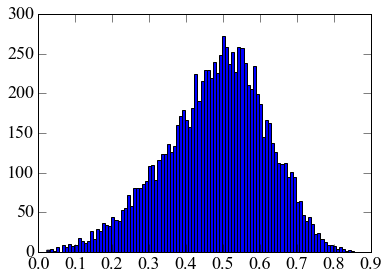

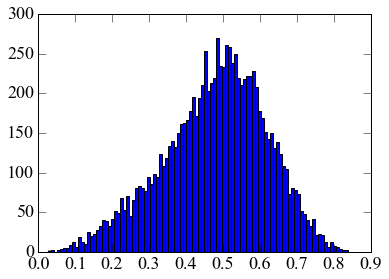

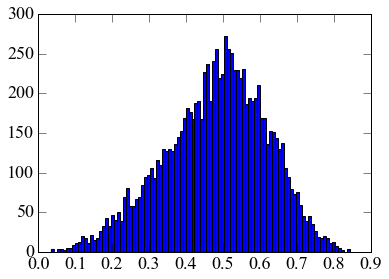

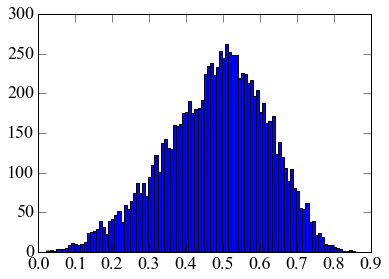

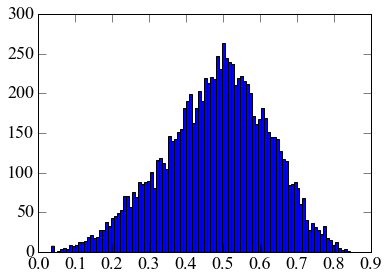

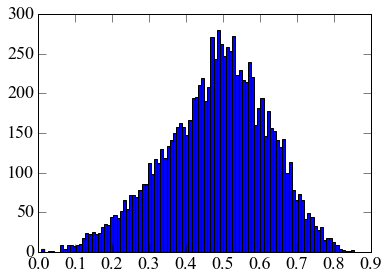

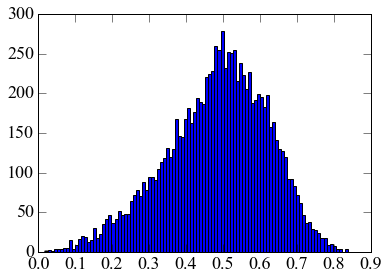

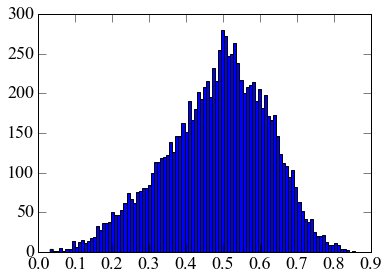

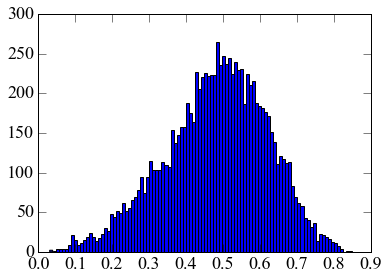

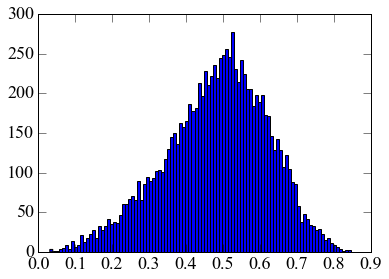

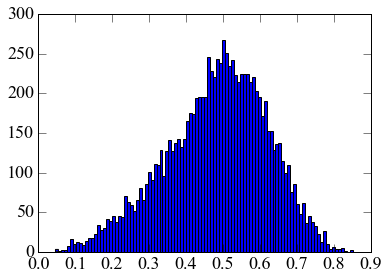

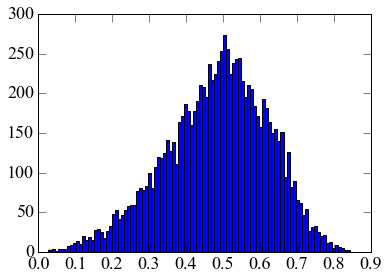

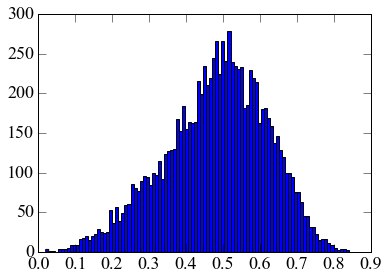

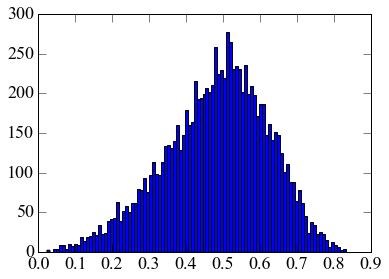

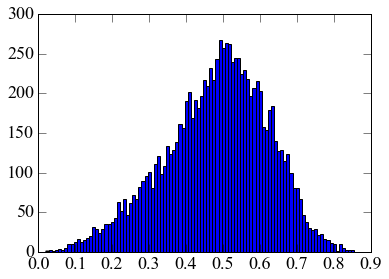

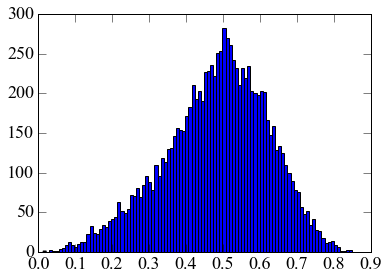

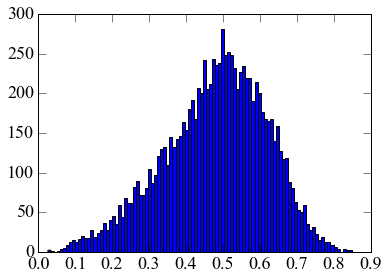

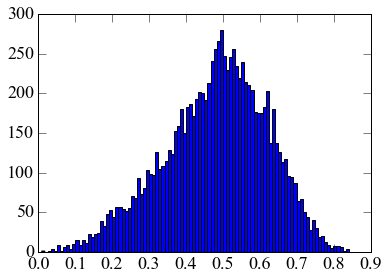

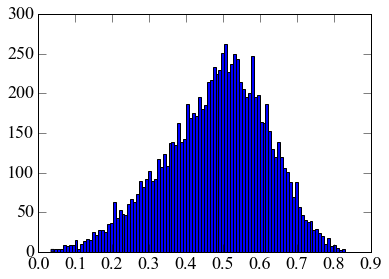

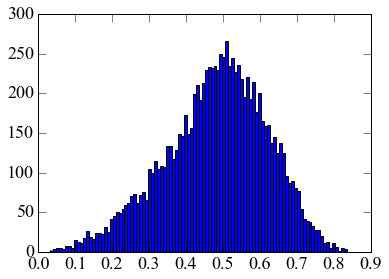

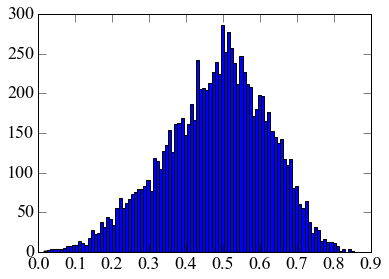

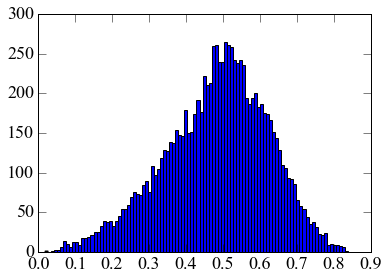

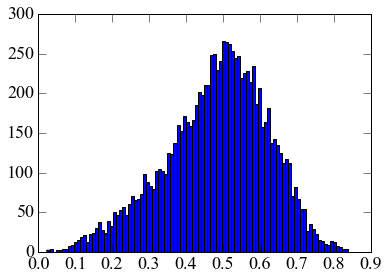

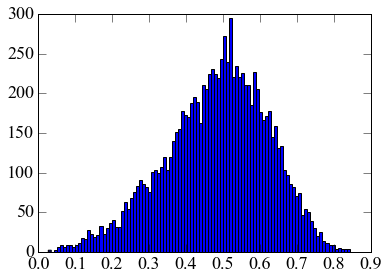

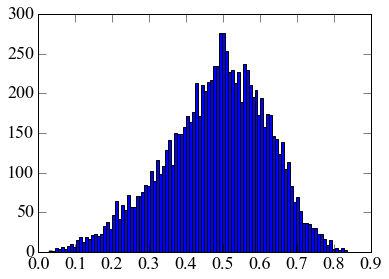

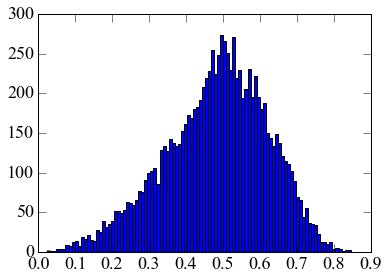

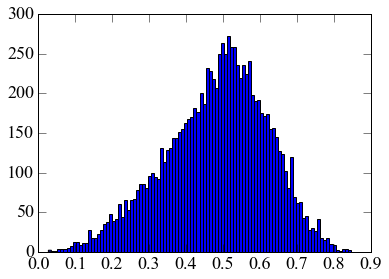

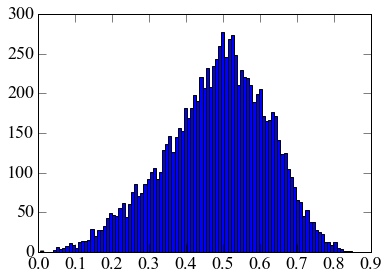

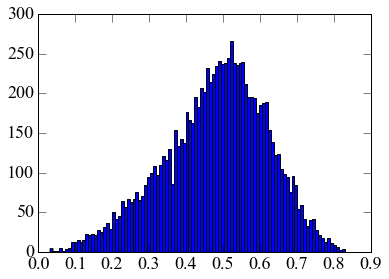

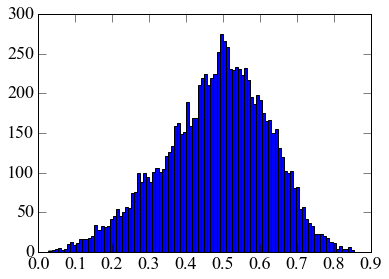

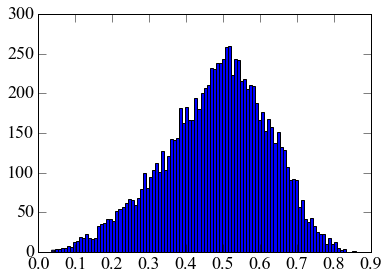

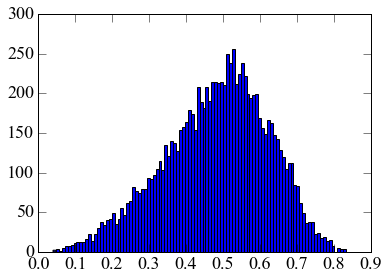

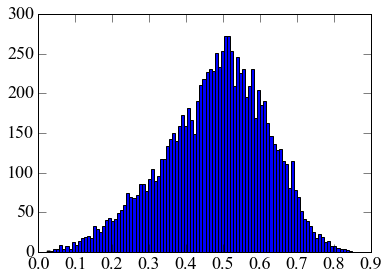

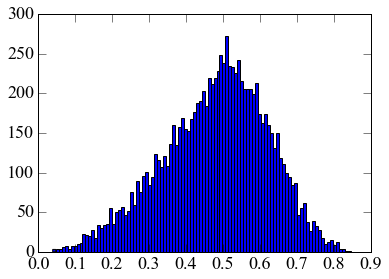

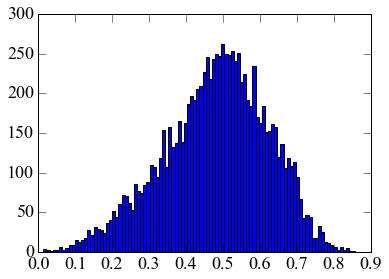

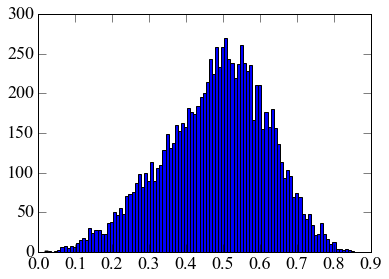

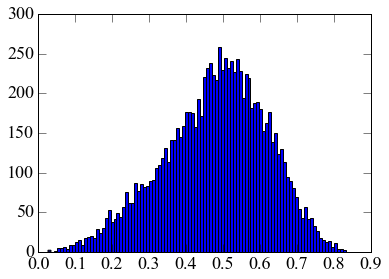

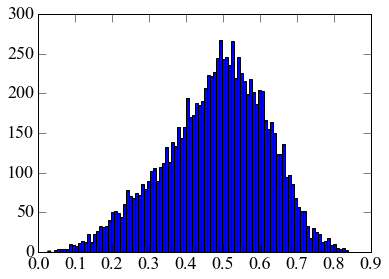

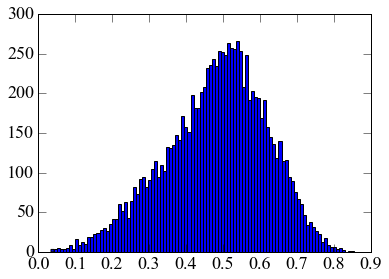

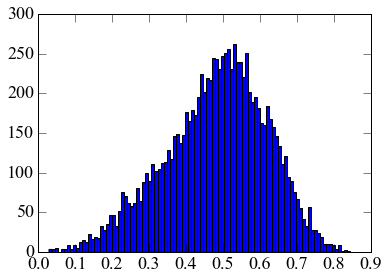

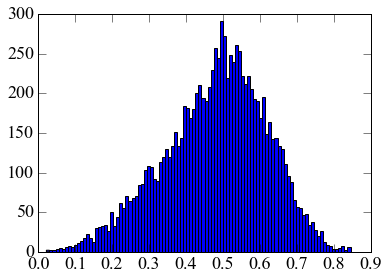

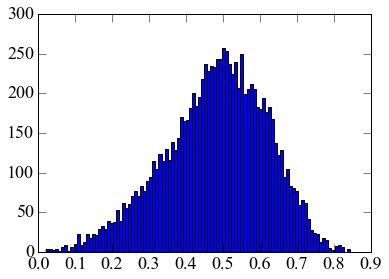

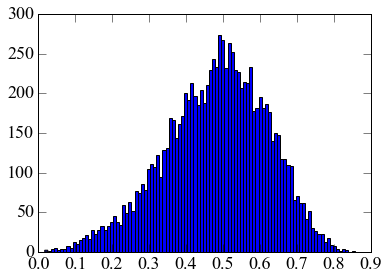

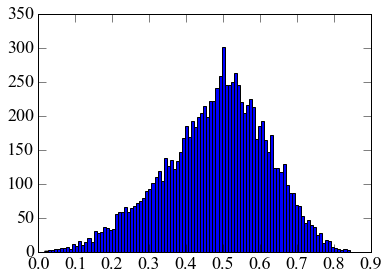

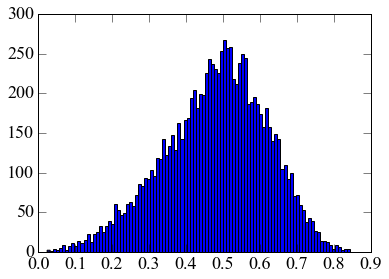

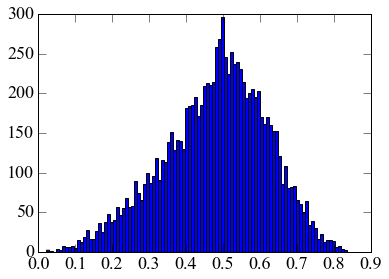

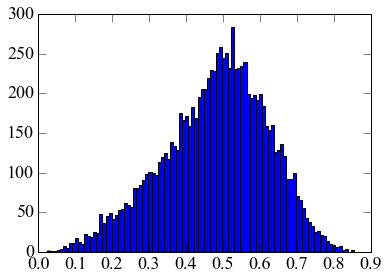

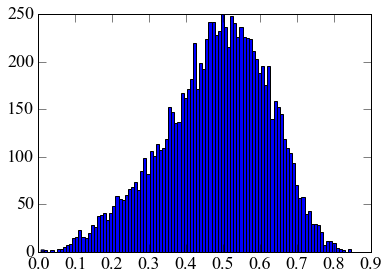

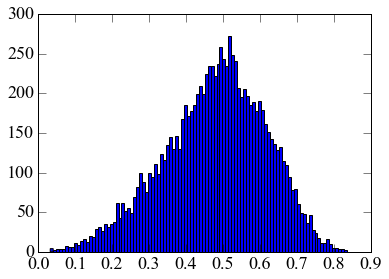

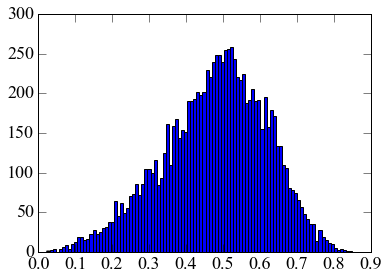

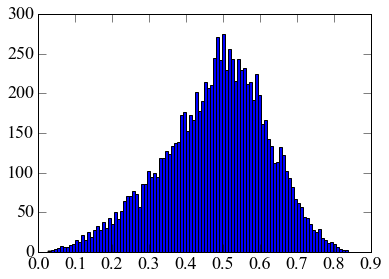

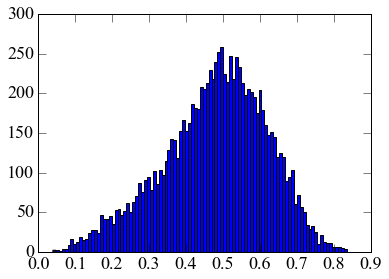

Gamma_min: 5299.97143672 Gamma_max 8037.5674625


In [13]:
#Sampling the grid
gamma_a = []
mean_dist = []

for x in xx:
    for y in yy:
        for z in zz:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = cube['cx']-x, cube['cy']-y,cube['cz']-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)
            plt.hist(dist,bins=100) #I put this line to double check distances are working with the p.c. 
            plt.show()
            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            # Print stats for each point as sanity checks.
            #print("{:.3f} {:.3f} {:.2f} {:5.2e} {:5.2f} {:5.2f}".format(dist.mean(),dist.std(),dist.max(),
            #                                 dist.min(),np.log10(Gamma.max()),np.log10(Gamma.min())))
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())

gamma_a = np.array(gamma_a)

print("Gamma_min:",gamma_a.min(),'Gamma_max',gamma_a.max())


In [14]:
#This test is juts to show that the sun of two uniform distributions are gaussian
#test = np.sqrt(np.random.uniform(0,1,10000)**2 + np.random.uniform(0,1,10000)**2)
#plt.hist(test,bins=100)

In [15]:
#Values relative to the mean flux
print(gamma_a/gamma_a.mean())

[ 0.97304399  0.97002959  0.9250704   0.9802417   1.00929301  0.94808549
  0.91489198  1.01227035  0.96018338  1.06270093  1.02609917  1.36091184
  1.00880457  0.94181135  0.92012925  0.96378932  0.94611641  1.22228277
  0.99713566  0.91783649  0.95408546  0.95271885  0.89738517  0.9528223
  0.99436899  0.99998614  0.97738728  1.02291423  0.96737563  1.12233446
  0.95984487  0.96407733  1.04812763  1.00027974  0.98541386  0.96338528
  0.96301256  0.95181502  0.93920634  1.26209297  0.96051693  0.96690783
  0.96216612  0.93630732  0.99808345  0.95207295  1.13935875  0.97185908
  0.97358629  0.93728942  0.93571475  0.96733971  1.00345765  1.05195869
  1.03809596  1.04567155  0.9842902   0.99639115  0.97919251  1.33024215
  0.97121821  0.98753222  1.01217764  0.95920775]


This plot shows $\Gamma(x,y,z)$ for a uniform distribution of points. $\Gamma$ should be sort of constant since one would expect that each point on the grid receives approximately the same ionising radiation contribution. 

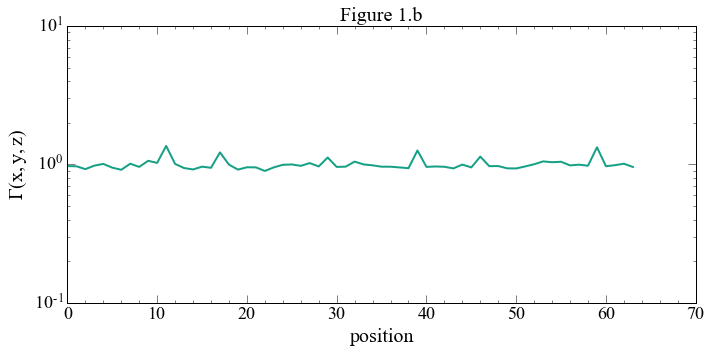

In [16]:
fig = plt.figure(1,figsize = (10,5))
plt.minorticks_on()

plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=2.0, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)$')
plt.xlabel('position')
plt.title('Figure 1.b')
plt.tight_layout()
#plt.savefig('gammavspos.pdf')
#This plot is the Gamma calculations at each point of the grid (the grid has 27 points).


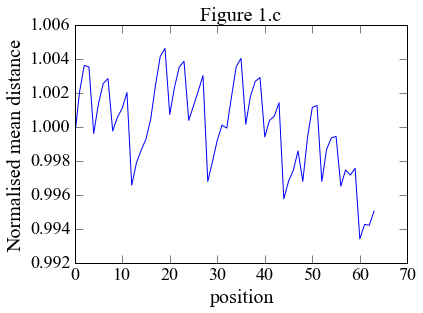

In [17]:
#Some fluctuations due to the distance module and also affected by the periodic conditions
plt.plot(mean_dist/np.mean(np.array(mean_dist)))
plt.ylabel('Normalised mean distance')
plt.xlabel('position')
plt.title('Figure 1.c')


# 2. Positions of QSOs obtained from LyMAS

In this section I read the data generated by the LyMAS simulation and calculate $\Gamma$ for the new distribution of points 

In [18]:
#Reading the file to obtain the Mass, Position x, y, z and Velocities vx, vy, vz. All in comoving coordinates
file_data = pd.read_csv('~/Documents/quasars/fof/fof_0.15_agn.asc', delim_whitespace = True, names = [
                 'Mass',
                  'x'  ,
                  'y'  ,
                  'z'  ,
                  'vx' ,
                  'vy' ,
                  'vz'])
file_data

,Mass,x,y,z,vx,vy,vz
0,1.176000e+09,64.029312,96.118446,94.357811,-108.525558,0.038883,125.278267
1,1.176000e+09,31.970230,82.244637,27.150129,-154.175385,-318.897034,432.606720
2,1.176000e+09,20.457739,61.333237,70.937714,109.857689,-122.219681,-182.980927
3,1.176000e+09,6.045333,49.639610,81.446640,168.360962,-86.660057,-159.306122
4,1.176000e+09,30.369637,48.476566,70.272385,36.338707,-116.117844,-209.051575
5,1.176000e+09,83.757652,59.006683,38.961243,-147.354980,55.835320,162.195129
6,1.176000e+09,87.420105,32.949280,80.450012,68.972794,182.669815,-195.104401
7,1.176000e+09,33.862167,14.385684,38.011646,-38.986431,6.221622,51.087532
8,1.176000e+09,40.265377,83.583923,58.377495,71.839394,46.847637,106.726158
9,1.176000e+09,85.879356,71.343719,87.419296,50.136135,73.989296,-95.600060


In [19]:
#Getting only the values for X, Y, Z
Xc = file_data['x'].values
Yc = file_data['y'].values
Zc = file_data['z'].values
#print values
print('X:',Xc)
print('y:',Yc)
print('Z:',Zc)
type(Xc)

X: [ 64.029312  31.97023   20.457739 ...,  10.747996  38.186295  49.480446]
y: [ 96.118446  82.244637  61.333237 ...,  24.950197  14.495839  38.947769]
Z: [ 94.357811  27.150129  70.937714 ...,  75.458778  14.195515  76.672195]


numpy.ndarray

In [20]:
len(Xc)

773491

Visualising the file name: "fof_0.15_noagn.asc" which corresponds to a box of 100Mpc. Red points indicate positions of the grid for which $\Gamma$ is calculated 

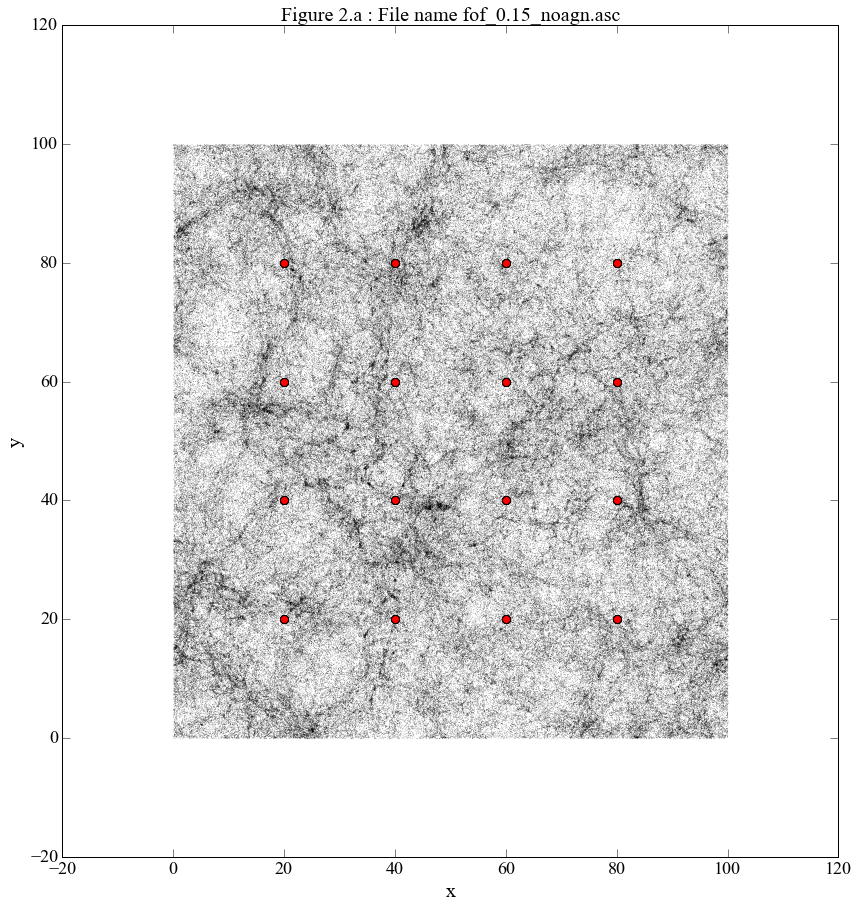

In [21]:
figure = plt.figure(figsize=(14,14))
plt.scatter(Xc[0:773491],Yc[0:773491], marker = '.', s = 0.005)
#plt.axhline(y = 1000)
#plt.axhline(y = -900)
g_x = np.arange(0.20,1.00,0.20)*100
g_y = np.arange(0.20,1.00,0.20)*100
g_z = np.arange(0.20,1.00,0.20)*100
for x in g_x:
    for y in g_y:
        for z in g_z:
            plt.plot(x,y, marker = 'o', color = 'r')
plt.title('Figure 2.a : File name fof_0.15_noagn.asc')
plt.xlabel('x')
plt.ylabel('y')

## Gamma for everypoint of the LyMAS simulation

In [22]:
#Grid
g_x = np.arange(0.20,1.00,0.20)*100
g_y = np.arange(0.20,1.00,0.20)*100
g_z = np.arange(0.20,1.00,0.20)*100
print(g_x.size*g_y.size*g_z.size)


64


In [23]:
#What about the constant values?
#I try these values just as a start but surely these values should be taken fron the simulation (?)
Lum = 1.0   #Test value
lamb0 = 10 # Test value
coeff = Lum/(4*np.pi)
box_size = 100

In [24]:

gamma_a = []
mean_dist = []


for x in g_x:
    for y in g_y:
        for z in g_z:
            # Periodic boundary contitions for the points near the edges.
            # Make the dx, dy and dz and create mask (m_*) for periodic
            # boundary conditions. Then, replace those points further away
            # by the their periodic analogue.
            dx, dy, dz = Xc-x, Yc-y, Zc-z
            m_x = np.abs(dx) > 0.5 * box_size
            dx[m_x] = box_size - np.abs(dx[m_x])
            
            # Same for y
            m_y = np.abs(dy) > 0.5 * box_size
            dy[m_y] = box_size - np.abs(dy[m_y])
            
            #Same for z
            m_z = np.abs(dz) > 0.5 * box_size
            dz[m_z] = box_size - np.abs(dz[m_z])
            #### end of the periodic boundary conditions
            
            # the distance array
            dist = np.sqrt((dx)**2 +(dy)**2 +(dz)**2)

            #Calculating the phothoionisation rate
            Gamma = np.sum(coeff* np.exp(-dist/lamb0)/(dist**2) )
            gamma_a.append(Gamma)
            mean_dist.append(dist.mean())
            

gamma_a = np.array(gamma_a)

print("Gamma_min:",gamma_a.min(),'Gamma_max',gamma_a.max())

Gamma_min: 4.37928428557 Gamma_max 20.2386872835


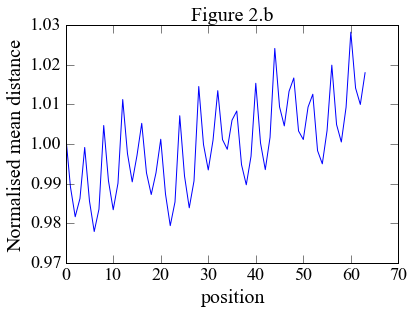

In [25]:
#Some fluctuations in the distance module
plt.plot(mean_dist/np.mean(np.array(mean_dist)))
plt.ylabel('Normalised mean distance')
plt.xlabel('position')
plt.title('Figure 2.b')

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          6.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          7.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   8.00000000e+00,   1.30000000e+01,
          7.00000000e+00,   9.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   8.00000000e+00,   2.00000000e+00,
          9.00000000e+00,   1.50000000e+01,   2.00000000e+01,
          1.30000000e+01,   1.60000000e+01,   1.50000000e+01,
        

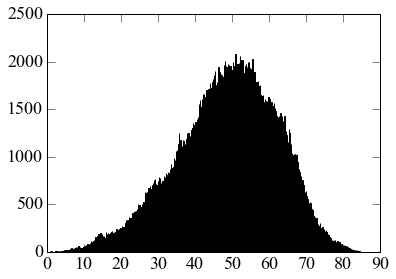

In [26]:
            plt.hist(dist,bins=1000) #Histogram of the distance module

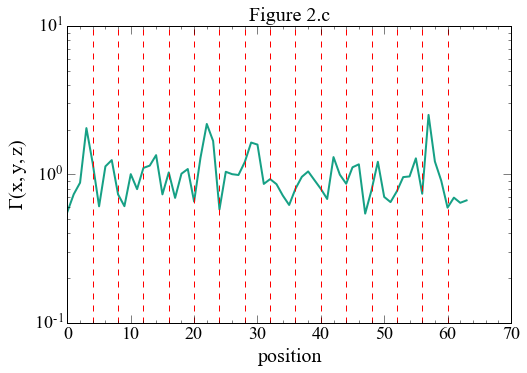

In [27]:
fig = plt.figure(1,figsize = (8,5))
plt.minorticks_on()
plt.plot(np.arange(gamma_a.size),gamma_a/gamma_a.mean(), linewidth=2.0, color='#16a085')
plt.yscale('log')
plt.ylabel('$\Gamma(x,y,z)$')
plt.xlabel('position')
for i in np.arange(16):
 plt.axvline(x=i*4,ls='--',color='r')
plt.title('Figure 2.c')

A small periodicity seems to come from the distance (Fig 2.b) that causes the peaks around the points x =4, x = 22, x =57 in this plot 